In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Linear Regression model of car prices.

In [58]:
""" Reading csv file."""
car_price_df = pd.read_csv('CarPrice.csv')
targets = car_price_df['price']
car_price_df.drop(['price'], axis=1, inplace=True)
car_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


## Preapring dataset
1. encode nominal and ordinal data
2. normalize data

### Encoding:

In [59]:
"""Clean CarName column and apply binary encoding."""

car_price_df['CarName'] = car_price_df['CarName'].apply(lambda x: str(x).split()[0])
cleanup_nums = {"CarName": { "maxda": "mazda" , "porcshce": "porsche" , "Nissan": "nissan" , "vokswagen": "volkswagen", "toyouta" : "toyota", "vw" : "volkswagen"} }
car_price_df.replace(cleanup_nums, inplace=True)
bi_encoder = ce.BinaryEncoder(cols=['CarName'])
car_price_df = bi_encoder.fit_transform(car_price_df)

In [60]:
"""Encode fueltype column."""

car_price_df['fueltype'] = (car_price_df['fueltype'] == 'gas').astype(int)

In [61]:
"""Encode aspiration column."""

car_price_df['aspiration'] = (car_price_df['aspiration'] == 'std').astype(int)

In [62]:
"""Encode doornumber column"""
car_price_df.replace({'doornumber': {'two': 2, 'four' : 4}}, inplace= True)

In [63]:
"""Apply binary encoding to carbody, drivewheel, enginetype and fuelsystem columns"""
bi_encoder = ce.BinaryEncoder(cols=['carbody', 'drivewheel', 'enginetype', 'fuelsystem'])
car_price_df = bi_encoder.fit_transform(car_price_df)

In [64]:
"""Encode enginelocation column"""
car_price_df['enginelocation'] = (car_price_df['enginelocation'] == 'front').astype(int)

In [65]:
"""Encode cylindernumber column"""
cylinders = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12 }
car_price_df.replace({'cylindernumber': cylinders}, inplace=True)

### Normalizing:

In [66]:
std_scaler = StandardScaler()
df_normalized = pd.DataFrame(std_scaler.fit_transform(car_price_df), columns=car_price_df.columns)
df_normalized.drop(['car_ID'], axis=1, inplace=True)


In [67]:
"""Split dataset for train and test parts."""
X_train, X_test, y_train, y_test = train_test_split(df_normalized, targets, test_size=0.2, random_state=0)

## Exploring feature correlation

<AxesSubplot: >

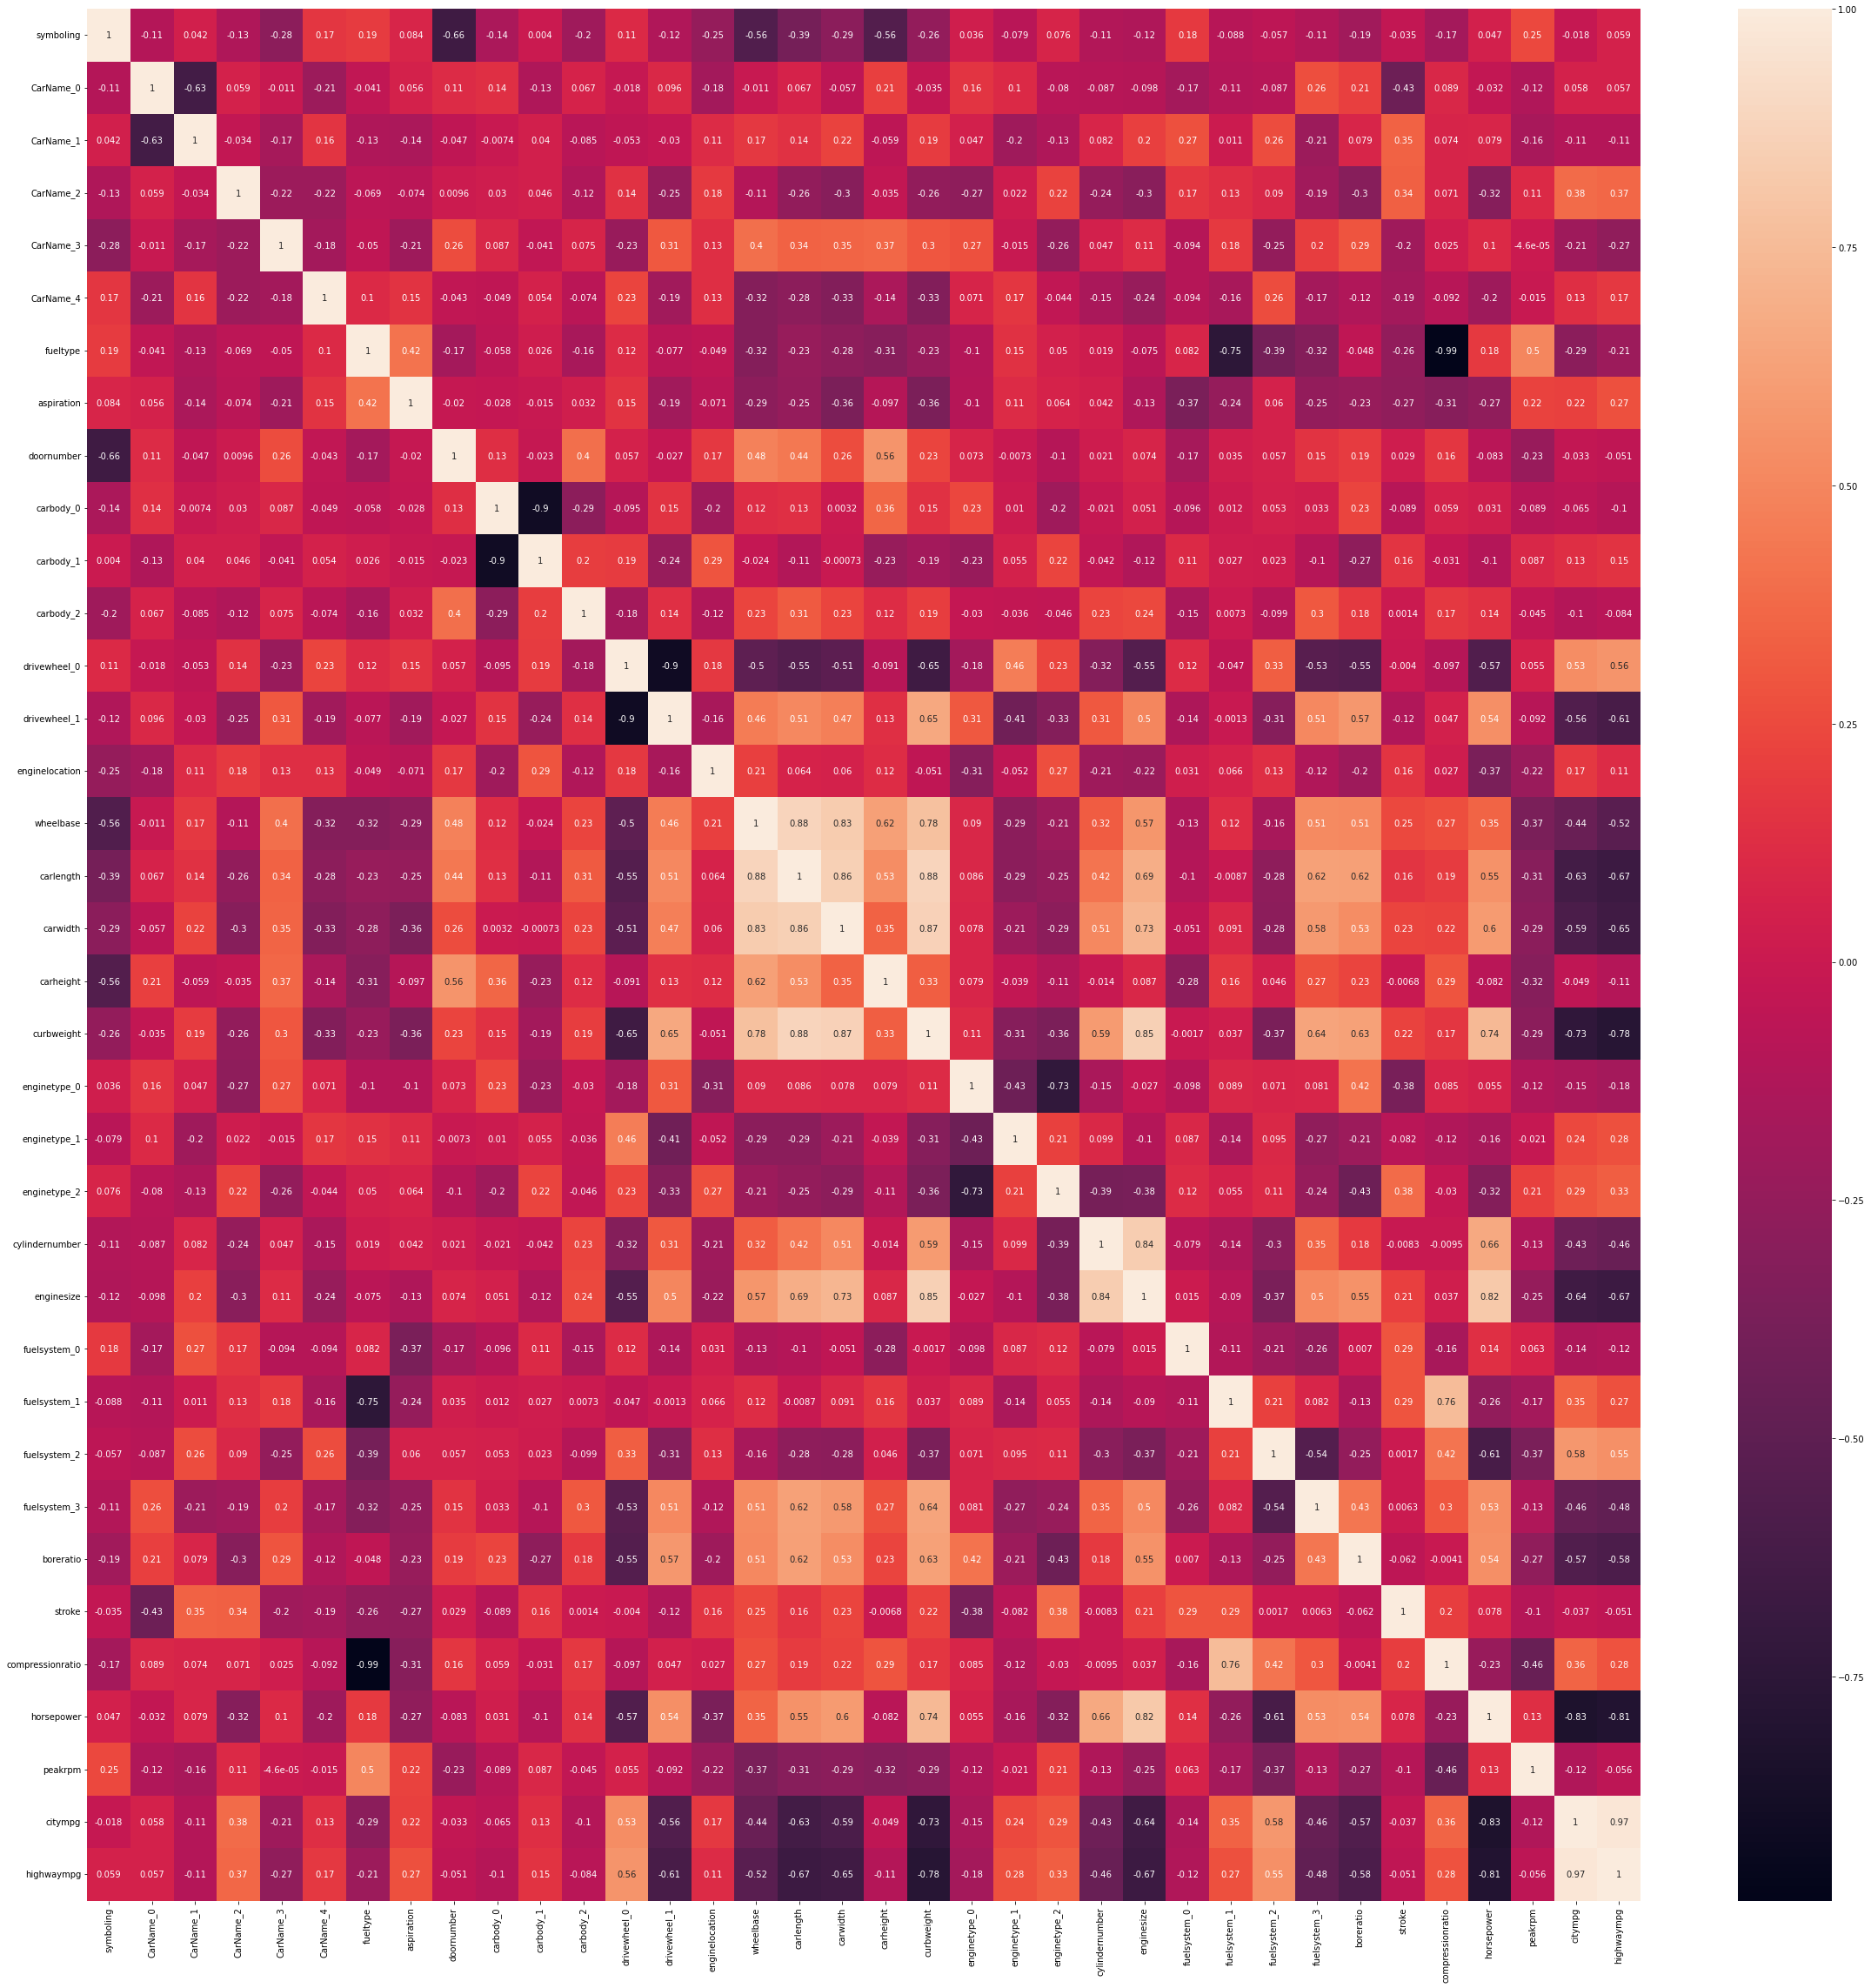

In [68]:
import seaborn as sns
plt.figure(figsize=(40, 40))
sns.heatmap(X_train.corr(), annot=True)

In [69]:
def print_highly_correlated(df, features, threshold=0.5):
    """Prints highly correlated features pairs in the data frame.
    reference: https://gist.github.com/wjptak/88575bbc5dde446e1186ffd41475c0f1

    Parameters:
    df: dataframe
    features: features which you want to check for the correlation
    threshold: if correlation between two features > threshold, print them

    Returns: None
    """

    corr_df = df[features].corr() # get correlation matrix
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        for v, i, j in s_corr_list:
            print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], abs(v)))

In [70]:
print_highly_correlated(X_train,X_train.columns)

fueltype and compressionratio = 0.985
citympg and highwaympg = 0.970
drivewheel_0 and drivewheel_1 = 0.903
carbody_0 and carbody_1 = 0.896
wheelbase and carlength = 0.881
carlength and curbweight = 0.876
carwidth and curbweight = 0.867
carlength and carwidth = 0.858
curbweight and enginesize = 0.853
cylindernumber and enginesize = 0.841
wheelbase and carwidth = 0.829
horsepower and citympg = 0.828
enginesize and horsepower = 0.815
horsepower and highwaympg = 0.806
curbweight and highwaympg = 0.781
wheelbase and curbweight = 0.778
fuelsystem_1 and compressionratio = 0.759
fueltype and fuelsystem_1 = 0.750
curbweight and horsepower = 0.743
curbweight and citympg = 0.731
carwidth and enginesize = 0.725
enginetype_0 and enginetype_2 = 0.725
carlength and enginesize = 0.686
enginesize and highwaympg = 0.673
carlength and highwaympg = 0.671
cylindernumber and horsepower = 0.662
symboling and doornumber = 0.658
drivewheel_1 and curbweight = 0.653
drivewheel_0 and curbweight = 0.653
carwidth a

## Regression:

In [71]:
from typing import NamedTuple

class Metrics(NamedTuple):
      MAE: float
      MSE: float
      RMSE: float
      r2: float

def get_metrics(y_actual, y_pred, to_print) -> Metrics:
      mae = \
            metrics.mean_absolute_error(y_true=y_actual, y_pred=y_pred)
      mse = \
            metrics.mean_squared_error(y_true=y_actual, y_pred=y_pred)
      rmse = \
            np.sqrt(metrics.mean_squared_error(y_true=y_actual, y_pred=y_pred))
      r2 = metrics.r2_score(y_true=y_actual, y_pred=y_pred)
      output_metrics = Metrics(MAE=mae, MSE=mse, RMSE=rmse, r2=r2)
      if to_print:
            print(f'Mean Absolute Error: {output_metrics.MSE}')
            print(f'Mean Squared Error: {output_metrics.MAE}')
            print(f'Root Mean Squared Error: {output_metrics.RMSE}')
            print(f'Coefficient of determination {output_metrics.r2}')
      return output_metrics


In [72]:
regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [73]:
y_pred = regression.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
get_metrics(y_test, y_pred, True)
results

Mean Absolute Error: 12800749.995202485
Mean Squared Error: 2244.059009926839
Root Mean Squared Error: 3577.8135774803145
Coefficient of determination 0.8346505791648887


,Actual,Predicted
52,6795.0,7283.522807
181,15750.0,17674.048996
5,15250.0,16227.502660
18,5151.0,-3132.410188
188,9995.0,10082.554645
170,11199.0,12684.091565
76,5389.0,6848.280875
154,7898.0,4127.519414
104,17199.0,16204.523224
33,6529.0,8208.492674


In [74]:
from sklearn.linear_model import Lasso
from typing import List

L1_metrics: List[Metrics] = []
best_model = None
max_r2 = -1
for alpha in np.arange(1.0, 50.0, 0.1):
    model_L1 = Lasso(alpha=alpha).fit(X_train, y_train)
    y_pred = model_L1.predict(X_test)
    curr_metrics = get_metrics(y_test,y_pred,False)
    if curr_metrics.r2 > max_r2:
        max_r2 = curr_metrics.r2
        best_model = model_L1
    L1_metrics.append(get_metrics(y_test,y_pred,False))
print(max_r2)
print(best_model.get_params())
print(best_model.coef_)

0.8388870305585722
{'alpha': 18.800000000000015, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
[  361.53526461    -0.           -96.98203176 -1406.12447955
   149.56245718    31.76165485    -0.          -542.99991999
   422.15180219 -1340.81400556 -1189.04791793   222.11654667
 -1176.44049781    -3.55025199 -1557.99011613  1468.73691594
 -1081.19917758   888.06241367   -35.39736944  2408.09150807
   664.04335563   604.69707195  1249.16119119   521.59552302
  3158.04459468  -188.49319633     0.             0.
     0.          -810.19739875  -160.98329019    -0.
    98.29255564   832.3906665     36.54689394    99.32572705]


In [75]:
coefficients = pd.DataFrame({'features': X_train.columns, 'coeffs': best_model.coef_})
coefficients

,features,coeffs
0,symboling,361.535265
1,CarName_0,-0.000000
2,CarName_1,-96.982032
3,CarName_2,-1406.124480
4,CarName_3,149.562457
5,CarName_4,31.761655
6,fueltype,-0.000000
7,aspiration,-542.999920
8,doornumber,422.151802
9,carbody_0,-1340.814006


In [80]:
coefficients[coefficients['coeffs'] == 0]

,features,coeffs
1,CarName_0,-0.0
6,fueltype,-0.0
26,fuelsystem_1,0.0
27,fuelsystem_2,0.0
28,fuelsystem_3,0.0
31,compressionratio,-0.0


In [81]:
X_reduced = X_train.drop(coefficients[coefficients['coeffs'] == 0]['features'], axis=1)
X_test_reduced = X_test.drop(coefficients[coefficients['coeffs'] == 0]['features'], axis=1)
X_reduced.columns

Index(['symboling', 'CarName_1', 'CarName_2', 'CarName_3', 'CarName_4',
       'aspiration', 'doornumber', 'carbody_0', 'carbody_1', 'carbody_2',
       'drivewheel_0', 'drivewheel_1', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype_0',
       'enginetype_1', 'enginetype_2', 'cylindernumber', 'enginesize',
       'fuelsystem_0', 'boreratio', 'stroke', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg'],
      dtype='object')

In [83]:
reduced_model = Lasso().fit(X_reduced, y_train)
y_pred = reduced_model.predict(X_test_reduced)
get_metrics(y_test,y_pred,True)

Mean Absolute Error: 12783446.185568027
Mean Squared Error: 2209.906767822661
Root Mean Squared Error: 3575.3945496361694
Coefficient of determination 0.8348740953574845


Metrics(MAE=2209.906767822661, MSE=12783446.185568027, RMSE=3575.3945496361694, r2=0.8348740953574845)